<a href="https://colab.research.google.com/github/GubioGL/Aprendendo_pytorch/blob/main/pytorch_learning_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução


Este jupyter notbook não entrará em detalhes sobre o problme de classificação.

Objetivos:

*   Dominar o pytorch
*   Hands-on em problemas de classificação com pytorch



# Pytorch para classificação:

## Classificação Binaria

Detalhes para aplicação em classificação:

*   Precisamos definir algums hiperparametros como numero de camadas escondidas , função de ativação ..
*   Qual o tipo de algoritmo.
*   Qual o tipo de dataset e o que precismao fazer para ajustar-lo.

Vamos fazer um exemplo com um data set simples simples e depois aumentar a complexidade.

Para tanto a biblioteca sckitlearn oferece algumas opção de dataset a ser criada.

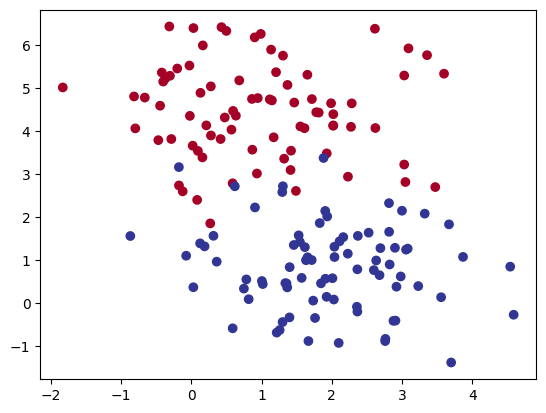

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Vamos criar 1000 amostras
n_amostra = 200

# Criando os dados
X,Y = make_blobs(n_amostra,centers=2,cluster_std=1.1, random_state=0)

# SSeparar os dados de treino e test

x_train, x_test, y_train, y_test = train_test_split(X,Y,
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=0) # make the random split reproducible

# Visualizando os dados
plt.scatter(x_train[:, 0],x_train[:, 1],c=y_train,cmap=plt.cm.RdYlBu);

Vamos construir nosso modelo

In [ ]:
import torch as tc
#Verificando se o GPU está disponivel
device = "cuda" if tc.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Contruindo o modelo
from torch import nn
class c_model(nn.Module):
    def __init__(self):
        super().__init__()

        # Aqui vamos adicionar o numero de camadas
        # Como nosso dataset X tem duas entrada a rede deve receber dois inputs
        # A primeir entrada de nn.Linear(Input,)
        # Segunda é o numero de neuronio na camada.
        self.layer_1 = nn.Linear(2,10)
        # a primeira entrada nesse caso deve ser igual a saida da primeira camada
        self.layer_2 = nn.Linear(10,1)
        # a saida é apenas uma pois é um classificação binara.
        #self.sigmoid = nn.Sigmoid()
    def forward(self,x):
        return self.layer_2(self.layer_1(x))


In [ ]:
# Convertendo para tensores
x_train, y_train = tc.Tensor(x_train),tc.Tensor(y_train)
x_test, y_test = tc.Tensor(x_test),tc.Tensor(y_test)

# Mandando os dados par GPU
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

# Criando um instância
model = c_model().to(device)

# Loss function
loss_f = tc.nn.BCEWithLogitsLoss()

# Algoritmo de otimização
otimizador = tc.optim.Adam(params = model.parameters(),lr=0.01)

def acuracia_f(true_value,pred_value):
    a =  tc.eq(true_value,pred_value).sum().item()
    # tc.eq calcula onde os valores são iguais
    return (a/len(pred_value))*100

BCEWithLogitsLoss:

    Essa é a função custo usada para classificação binara, chamada de entropia cruzada essa tem um diferencial que é implmentado um função sigmoid dentro dela.

    Em termo matematica é como se a ultima camada tivesse uma função de ativação sigmoide que faz o input virar algo paracido com um propabilidade(em termo  numerico o resultado sempre fica entre 0 e 1) "deixando o modelo numericamente estavel" de acordo com o tutorial

### Detalhes_2

In [ ]:
model.train()

a =model(x_train).squeeze()
a[:5]

tensor([-0.1579,  0.0903,  0.2415,  0.1673, -0.2673], device='cuda:0',
       grad_fn=<SliceBackward0>)

Precisamos fazer alguns ajuste no resultado do foward para podemos comparar com a a predição(y_train)

In [ ]:
y_train[:5]

tensor([1., 1., 0., 0., 0.], device='cuda:0')

1° Vamos converter a para os valores entre 0 e  1, para ficar parecido com um probabilidade de pertencer uma classe(1) ou não(0).

Para tanto é so usar um função sigmoid:

In [ ]:
tc.sigmoid(a)[0:5]

tensor([0.4606, 0.5226, 0.5601, 0.5417, 0.4336], device='cuda:0',
       grad_fn=<SliceBackward0>)

Agora vamos arredondar, sendo mais especifico :

    Se a >= 0.5, y=1 (class 1)
    Se a < 0.5, y=0 (class 0)

In [ ]:
tc.round(tc.sigmoid(a)[0:5])

tensor([0., 1., 1., 1., 0.], device='cuda:0', grad_fn=<RoundBackward0>)

Agora nosso output é zero ou 1, e assim podemos comparar melhor com y_train

### Continuando ...

In [ ]:
epochs = 1000
for epoch in range(epochs):
    model.train()

    forw = model(x_train).squeeze()# squeez diminui uma das dimensões antes [n,1] agora [n] , mais
    loss = loss_f(forw,y_train)
    otimizador.zero_grad()
    loss.backward()
    otimizador.step()


    # Teste
    model.eval()
    with tc.inference_mode():
        forw   = model(x_test).squeeze()
        loss_t = loss_f(forw,y_test)
        acc    = acuracia_f(tc.round(tc.sigmoid(forw)),y_test)
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {loss_t:.5f}, Test acc: {acc:.2f}%")


Epoch: 0 | Loss: 0.72314 | Test loss: 0.68214, Test acc: 47.50%
Epoch: 100 | Loss: 0.13792 | Test loss: 0.09517, Test acc: 97.50%
Epoch: 200 | Loss: 0.10864 | Test loss: 0.08201, Test acc: 95.00%
Epoch: 300 | Loss: 0.10628 | Test loss: 0.08159, Test acc: 95.00%
Epoch: 400 | Loss: 0.10612 | Test loss: 0.08185, Test acc: 95.00%
Epoch: 500 | Loss: 0.10612 | Test loss: 0.08194, Test acc: 95.00%
Epoch: 600 | Loss: 0.10612 | Test loss: 0.08195, Test acc: 95.00%
Epoch: 700 | Loss: 0.10612 | Test loss: 0.08195, Test acc: 95.00%
Epoch: 800 | Loss: 0.10612 | Test loss: 0.08195, Test acc: 95.00%
Epoch: 900 | Loss: 0.10612 | Test loss: 0.08195, Test acc: 95.00%


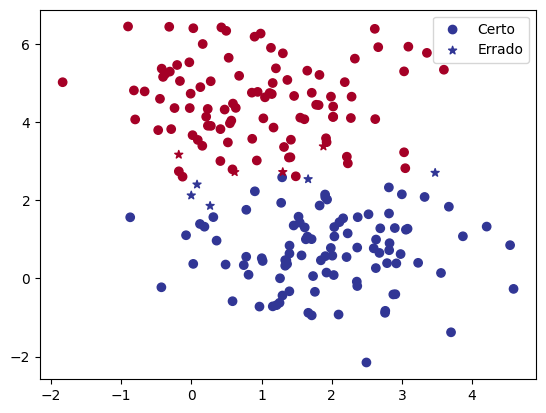

In [ ]:
import numpy as np

# vamos converte para tensor e manda para GPU
x = tc.Tensor(X).to(device)

# Teste
model.eval()
with tc.inference_mode():
    forw = model(x)
# obtendo o predição do modelo
output = tc.round(tc.sigmoid(forw)).cpu().numpy().squeeze()

# convertendo em numpy para poder plotar
x = x.cpu().numpy()

# plotando os dados que o modelo acertou
a = output == Y
plt.scatter(x[a, 0],x[a, 1],c=output[a],cmap=plt.cm.RdYlBu,marker='o',label="Certo");

# plotando os dados que o modelo errou
a = np.logical_not(a)
plt.scatter(x[a, 0],x[a, 1],c=output[a],cmap=plt.cm.RdYlBu,marker='*',label="Errado");
plt.legend()

Vamos para um caso mais complicado

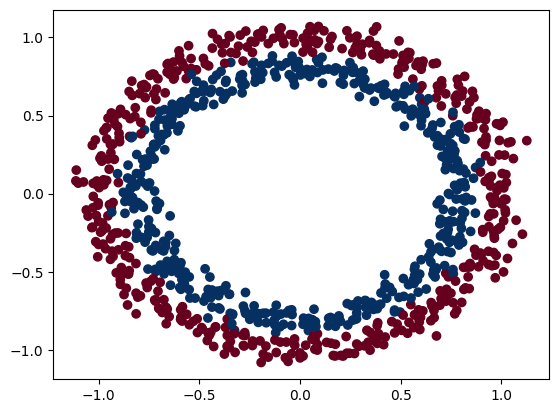

In [ ]:
from sklearn.datasets import make_circles

n_samples = 100
X, Y = make_circles(n_samples=1000,noise=0.05,random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.RdBu);


Nesse caso não podemos utilizar o modelo anterior, pois ele usa apenas rede lineares. Essse é um tipo de classificaçao que precisa de um rede com funções de ativação não linear.

In [ ]:
# Contruindo o modelo
from torch import nn
class c_model2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(2,15)
        self.layer_2 = nn.Linear(15,5)
        self.layer_3 = nn.Linear(5,1)
        self.relu = nn.ReLU()
    def forward(self,x):
        return self.layer_3( self.relu( self.layer_2( self.relu( self.layer_1(x) ) ) ) )

# Criando um instância
model = c_model2().to(device)

# Loss function
loss_f = tc.nn.BCEWithLogitsLoss()

# Algoritmo de otimização
otimizador = tc.optim.Adam(params = model.parameters(),lr=0.01)

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

# Convertendo para tensores e Mandando os dados par GPU
x_train, y_train = tc.Tensor(x_train).to(device), tc.Tensor(y_train).to(device)
x_test , y_test  = tc.Tensor(x_test).to(device) , tc.Tensor(y_test).to(device)

epochs = 1000
for epoch in range(epochs):

    model.train()

    forw = model(x_train).squeeze()# squeez diminui uma das dimensões antes [n,1] agora [n] , mais
    loss = loss_f(forw,y_train)
    otimizador.zero_grad()
    loss.backward()
    otimizador.step()

    # Teste
    model.eval()
    with tc.inference_mode():
        forw   = model(x_test).squeeze()
        loss_t = loss_f(forw,y_test)
        acc    = acuracia_f(tc.round(tc.sigmoid(forw)),y_test)
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {loss_t:.5f}, Test acc: {acc:.2f}%")


Epoch: 0 | Loss: 0.71182 | Test loss: 0.71921, Test acc: 48.33%
Epoch: 100 | Loss: 0.33742 | Test loss: 0.31536, Test acc: 95.67%
Epoch: 200 | Loss: 0.13004 | Test loss: 0.11057, Test acc: 97.67%
Epoch: 300 | Loss: 0.09154 | Test loss: 0.07124, Test acc: 97.67%
Epoch: 400 | Loss: 0.07364 | Test loss: 0.05457, Test acc: 98.00%
Epoch: 500 | Loss: 0.06610 | Test loss: 0.04681, Test acc: 98.00%
Epoch: 600 | Loss: 0.06231 | Test loss: 0.04345, Test acc: 98.00%
Epoch: 700 | Loss: 0.06010 | Test loss: 0.04117, Test acc: 98.00%
Epoch: 800 | Loss: 0.05873 | Test loss: 0.03984, Test acc: 98.00%
Epoch: 900 | Loss: 0.05788 | Test loss: 0.03903, Test acc: 98.33%


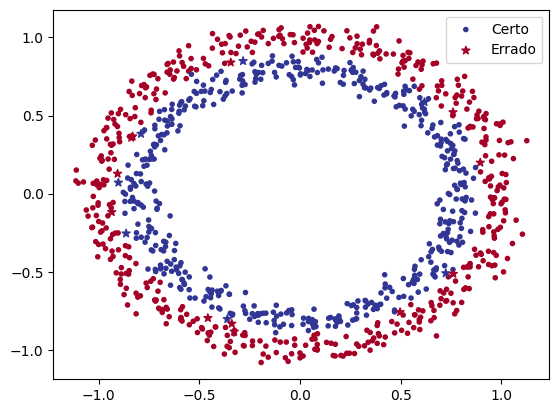

In [ ]:
# vamos converte para tensor e manda para GPU
x = tc.Tensor(X).to(device)

# Teste
model.eval()
with tc.inference_mode():
    forw = model(x)
# obtendo o predição do modelo
output = tc.round(tc.sigmoid(forw)).cpu().numpy().squeeze()

# convertendo em numpy para poder plotar
x = x.cpu().numpy()

# plotando os dados que o modelo acertou
a = output == Y
plt.scatter(x[a, 0],x[a, 1],c=output[a],cmap=plt.cm.RdYlBu,marker='.',label="Certo");

# plotando os dados que o modelo errou
a = np.logical_not(a)
plt.scatter(x[a, 0],x[a, 1],c=output[a],cmap=plt.cm.RdYlBu,marker='*',label="Errado");
plt.legend()

## Classificação com multi classes

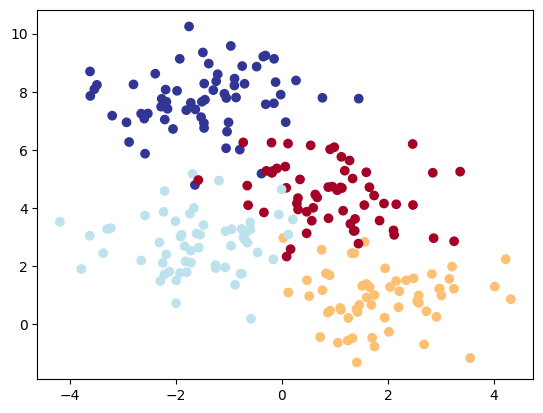

In [78]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Vamos criar 1000 amostras
n_amostra = 300

# Criando os dados
X,Y = make_blobs(n_amostra
                 ,centers = 4 # mudar aqui 4 Label
                 ,cluster_std = 1
                 , random_state = 0)

# SSparar os dados de treino e test

x_train, x_test, y_train, y_test = train_test_split(X,Y,
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=0) # make the random split reproducible

# Visualizando os dados
plt.scatter(x_train[:, 0],x_train[:, 1],c=y_train,cmap=plt.cm.RdYlBu);

In [79]:
y_train,y_train.dtype

(array([3, 2, 2, 3, 1, 1, 1, 2, 1, 3, 3, 3, 0, 0, 0, 3, 3, 1, 2, 2, 1, 3,
        3, 3, 3, 2, 0, 2, 2, 2, 0, 2, 2, 3, 3, 1, 1, 1, 0, 2, 1, 0, 1, 3,
        2, 3, 3, 3, 3, 2, 1, 0, 3, 1, 3, 3, 0, 1, 2, 1, 0, 3, 0, 3, 3, 0,
        3, 2, 0, 1, 1, 2, 0, 1, 3, 2, 2, 3, 0, 0, 3, 0, 3, 3, 2, 1, 2, 3,
        0, 1, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 2, 3, 3, 2, 1, 2, 2, 3,
        1, 1, 0, 3, 0, 0, 3, 3, 0, 0, 1, 0, 3, 1, 3, 1, 2, 0, 1, 2, 2, 0,
        3, 0, 3, 1, 2, 1, 0, 1, 0, 1, 2, 1, 3, 0, 0, 2, 3, 2, 3, 3, 2, 1,
        1, 3, 0, 2, 3, 3, 2, 2, 3, 2, 3, 0, 1, 3, 2, 1, 0, 1, 1, 1, 1, 3,
        0, 3, 3, 2, 0, 3, 2, 3, 2, 1, 0, 0, 1, 2, 3, 1, 1, 0, 2, 1, 1, 1,
        1, 2, 2, 1, 0, 3, 1, 3, 0, 2, 0, 3, 2, 0, 1, 1, 2, 0, 3, 0, 2, 3,
        0, 2, 2, 2, 0, 1, 0, 3, 0, 0, 1, 0, 2, 3, 2, 2, 0, 1, 2, 1]),
 dtype('int64'))

Note que o y_train tem 4 valores/label diferentes. Isso indica que cada valor é um classe/cor.

In [80]:
import torch as tc
#Verificando se o GPU está disponivel
device = "cuda" if tc.cuda.is_available() else "cpu"
device

'cuda'

Dentro da classe na camada final devemos mudar de 1 saida para 4, pois temos 4 label ou 4 tipos de cores diferente cada um é um objeto que queremos classificar.

Mudaremos também o tipo de funções custo.

In [82]:
# Contruindo o modelo
from torch import nn
class Multi_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(2,15)
        self.layer_2 = nn.Linear(15,15)
        self.layer_3 = nn.Linear(15,5)
        self.layer_4 = nn.Linear(5,4) # Muda aqui
        self.relu = nn.ReLU()
        #self.soft = nn.Softmax(dim=1)
    def forward(self,x):
        saida = self.layer_4( self.relu( # 6° Camada
                self.layer_3( self.relu( # 5° Camada
                    self.layer_2( self.relu( # 4° Camada
                    self.layer_2( self.relu( # 3° Camada
                    self.layer_2( self.relu( # 2° Camada
                        self.layer_1(x))))))) # 1° Camada
                ))))
        return saida

def acuracia_f(true_value,pred_value):
    a =  tc.eq(true_value,pred_value).sum().item()
    # tc.eq calcula onde os valores são iguais
    return (a/len(pred_value))*100

# Criando um instância
model = Multi_model().to(device)

# Função custo
loss_f =  nn.CrossEntropyLoss()

# Algoritmo de otimização
otimizador = tc.optim.Adam(params = model.parameters(),lr=0.001)


# Convertendo para tensores e Mandando os dados par GPU
y_train, y_test = tc.tensor(y_train).to(device)                 , tc.tensor(y_test).to(device)
x_train, x_test = tc.tensor(x_train,dtype=tc.float32).to(device), tc.tensor(x_test,dtype=tc.float32).to(device)

<ipython-input-82-f7b282133730>:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train, y_test = tc.tensor(y_train).to(device)                 , tc.tensor(y_test).to(device)
<ipython-input-82-f7b282133730>:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train, x_test = tc.tensor(x_train,dtype=tc.float32).to(device), tc.tensor(x_test,dtype=tc.float32).to(device)


In [83]:

epochs = 1000
for epoch in range(epochs):

    model.train()

    forw = model(x_train)
    loss = loss_f(forw,y_train)
    otimizador.zero_grad()
    loss.backward()
    otimizador.step()

    # Teste
    model.eval()
    with tc.inference_mode():
        forw   = model(x_test)
        loss_t = loss_f(forw,y_test)

        y_pred = tc.softmax(forw, dim=1).argmax(dim=1)#.to(tc.float32)
        acc    = acuracia_f(y_pred,y_test)
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {loss_t:.5f}, Test acc: {acc:.2f}%")


Epoch: 0 | Loss: 1.40937 | Test loss: 1.41876, Test acc: 28.33%
Epoch: 100 | Loss: 1.24631 | Test loss: 1.28489, Test acc: 25.00%
Epoch: 200 | Loss: 0.52233 | Test loss: 0.45147, Test acc: 81.67%
Epoch: 300 | Loss: 0.17044 | Test loss: 0.07467, Test acc: 98.33%
Epoch: 400 | Loss: 0.14344 | Test loss: 0.06766, Test acc: 98.33%
Epoch: 500 | Loss: 0.13567 | Test loss: 0.06785, Test acc: 98.33%
Epoch: 600 | Loss: 0.13139 | Test loss: 0.07135, Test acc: 98.33%
Epoch: 700 | Loss: 0.12775 | Test loss: 0.07386, Test acc: 98.33%
Epoch: 800 | Loss: 0.12450 | Test loss: 0.07851, Test acc: 96.67%
Epoch: 900 | Loss: 0.12170 | Test loss: 0.08473, Test acc: 96.67%


<ipython-input-85-7681cc769193>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X,Y = tc.tensor(X,dtype=tc.float32).to(device),tc.tensor(Y).to(device)


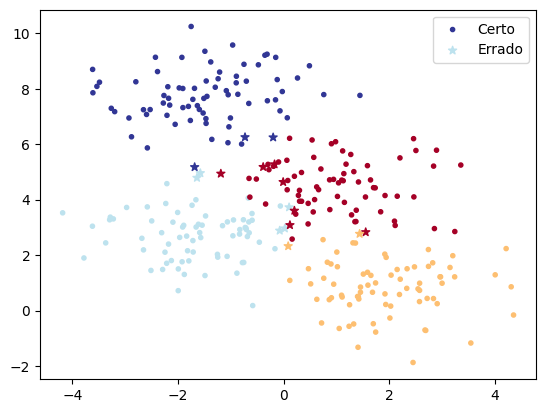

In [85]:
import numpy as np

# vamos converte para tensor e manda para GPU
X,Y = tc.tensor(X,dtype=tc.float32).to(device),tc.tensor(Y).to(device)

# Prdição
model.eval()
with tc.inference_mode():
    forw   = model(X)
    output = tc.softmax(forw, dim=1).argmax(dim=1).cpu().numpy()

# convertendo em numpy para poder plotar
x = X.cpu().numpy()
y = Y.cpu().numpy()

# plotando os dados que o modelo acertou
a = output == y
plt.scatter(x[a, 0],x[a, 1],c=output[a],cmap=plt.cm.RdYlBu,marker='.',label="Certo");

# plotando os dados que o modelo errou
a = np.logical_not(a)
plt.scatter(x[a, 0],x[a, 1],c=output[a],cmap=plt.cm.RdYlBu,marker='*',label="Errado");
plt.legend()

## Classificação com multi label